# Interactive Double-Slit Experiment Simulation

This notebook provides an interactive exploration of the famous double-slit experiment, one of the most important demonstrations in quantum mechanics that shows the wave-particle duality of light.

## Learning Objectives
- Understand the physics behind the double-slit experiment
- Explore how different parameters affect the interference pattern
- Compare single-slit vs double-slit patterns
- Analyze experimental data and compare with theory
- Prepare for your own physical experiment

In [4]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from double_slit_simulation import (
    DoubleslitSimulator, 
    InterferenceAnalyzer, 
    plot_interference_pattern
)

# Set up matplotlib for inline plots
%matplotlib inline

print("✅ All libraries imported successfully!")
print("📊 Ready to explore the double-slit experiment!")

✅ All libraries imported successfully!
📊 Ready to explore the double-slit experiment!


## 1. Basic Theory

The double-slit experiment demonstrates wave interference. When coherent light passes through two parallel slits, it creates an interference pattern on a screen. The pattern consists of:

- **Bright fringes**: Where waves from both slits arrive in phase (constructive interference)
- **Dark fringes**: Where waves arrive out of phase (destructive interference)

The key equations are:
- **Fringe spacing**: $\Delta y = \frac{\lambda D}{d}$
- **Bright fringes**: $d \sin \theta = m\lambda$ (where m = 0, ±1, ±2, ...)
- **Dark fringes**: $d \sin \theta = (m + \frac{1}{2})\lambda$

Where:
- λ = wavelength of light
- D = distance to screen
- d = slit separation
- θ = angle from center

In [5]:
# Interactive widget for exploring parameter effects
def interactive_double_slit():
    # Create widgets
    wavelength_slider = widgets.FloatSlider(
        value=650,
        min=400,
        max=800,
        step=10,
        description='Wavelength (nm):',
        style={'description_width': 'initial'}
    )
    
    slit_width_slider = widgets.FloatSlider(
        value=50,
        min=10,
        max=200,
        step=5,
        description='Slit Width (μm):',
        style={'description_width': 'initial'}
    )
    
    slit_separation_slider = widgets.FloatSlider(
        value=200,
        min=50,
        max=500,
        step=10,
        description='Slit Separation (μm):',
        style={'description_width': 'initial'}
    )
    
    screen_distance_slider = widgets.FloatSlider(
        value=1.0,
        min=0.5,
        max=3.0,
        step=0.1,
        description='Screen Distance (m):',
        style={'description_width': 'initial'}
    )
    
    double_slit_checkbox = widgets.Checkbox(
        value=True,
        description='Double Slit (uncheck for single slit)',
        style={'description_width': 'initial'}
    )
    
    output = widgets.Output()
    
    def update_plot(wavelength, slit_width, slit_separation, screen_distance, double_slit):
        with output:
            output.clear_output(wait=True)
            
            # Create simulator with current parameters
            simulator = DoubleslitSimulator(
                wavelength=wavelength * 1e-9,  # Convert nm to m
                slit_width=slit_width * 1e-6,  # Convert μm to m
                slit_separation=slit_separation * 1e-6,  # Convert μm to m
                screen_distance=screen_distance
            )
            
            # Run simulation
            y_positions, intensity = simulator.simulate_experiment(
                screen_width=0.01,  # 1 cm
                resolution=1000,
                double_slit=double_slit
            )
            
            # Plot
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
            
            # 1D intensity plot
            y_mm = y_positions * 1000
            ax1.plot(y_mm, intensity, 'b-', linewidth=2)
            ax1.set_xlabel('Position on Screen (mm)')
            ax1.set_ylabel('Normalized Intensity')
            title = 'Double-Slit' if double_slit else 'Single-Slit'
            ax1.set_title(f'{title} Interference Pattern')
            ax1.grid(True, alpha=0.3)
            
            # 2D visualization
            pattern_2d = np.tile(intensity, (50, 1))
            extent = [y_mm[0], y_mm[-1], -1, 1]
            im = ax2.imshow(pattern_2d, extent=extent, aspect='auto', cmap='hot')
            ax2.set_xlabel('Position on Screen (mm)')
            ax2.set_ylabel('Height (arbitrary)')
            ax2.set_title('2D Pattern Visualization')
            plt.colorbar(im, ax=ax2, label='Intensity')
            
            plt.tight_layout()
            plt.show()
            
            # Calculate and display fringe spacing
            if double_slit:
                theoretical_spacing = (wavelength * 1e-9 * screen_distance / 
                                     (slit_separation * 1e-6)) * 1000
                print(f"Theoretical fringe spacing: {theoretical_spacing:.2f} mm")
    
    # Create interactive widget
    interactive_widget = widgets.interactive(
        update_plot,
        wavelength=wavelength_slider,
        slit_width=slit_width_slider,
        slit_separation=slit_separation_slider,
        screen_distance=screen_distance_slider,
        double_slit=double_slit_checkbox
    )
    
    display(interactive_widget, output)

# Run the interactive widget
interactive_double_slit()

interactive(children=(FloatSlider(value=650.0, description='Wavelength (nm):', max=800.0, min=400.0, step=10.0…

Output()

## 2. Comparison: Single Slit vs Double Slit

Let's compare the patterns from single and double slits to understand the difference between diffraction and interference.

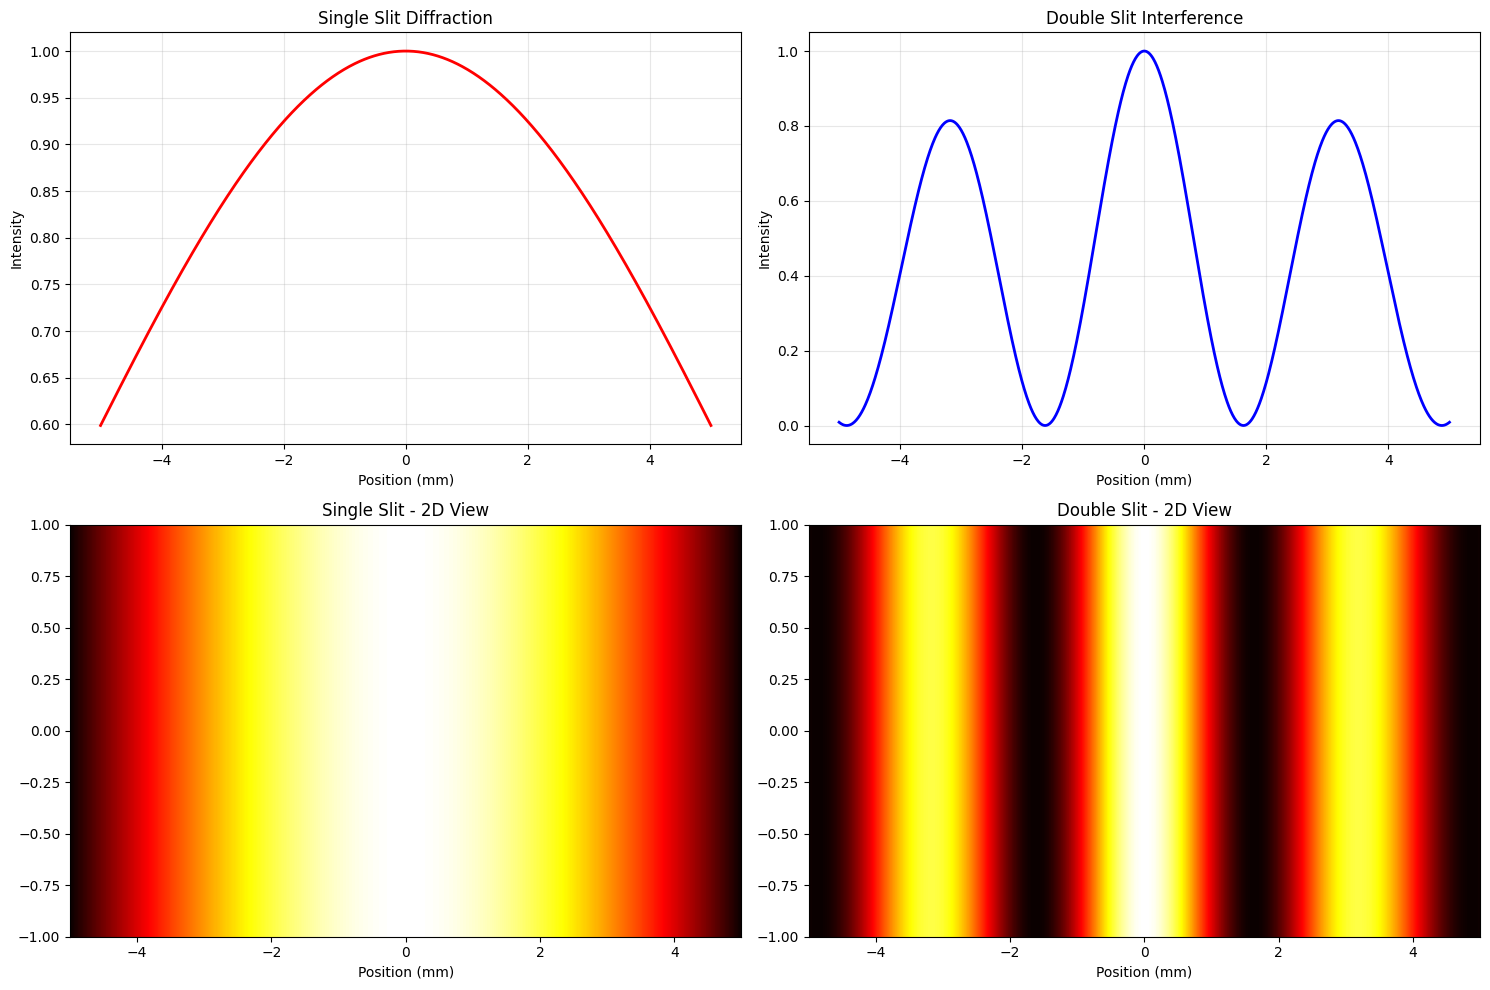

Key Differences:
• Single slit: Broad central maximum with weaker side maxima (diffraction)
• Double slit: Multiple sharp fringes of similar intensity (interference)
• Double slit pattern is modulated by single slit envelope


In [6]:
# Compare single and double slit patterns
simulator = DoubleslitSimulator()

# Generate both patterns
y_pos, single_intensity = simulator.simulate_experiment(double_slit=False)
y_pos, double_intensity = simulator.simulate_experiment(double_slit=True)

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Single slit - 1D
y_mm = y_pos * 1000
axes[0, 0].plot(y_mm, single_intensity, 'r-', linewidth=2)
axes[0, 0].set_xlabel('Position (mm)')
axes[0, 0].set_ylabel('Intensity')
axes[0, 0].set_title('Single Slit Diffraction')
axes[0, 0].grid(True, alpha=0.3)

# Double slit - 1D
axes[0, 1].plot(y_mm, double_intensity, 'b-', linewidth=2)
axes[0, 1].set_xlabel('Position (mm)')
axes[0, 1].set_ylabel('Intensity')
axes[0, 1].set_title('Double Slit Interference')
axes[0, 1].grid(True, alpha=0.3)

# Single slit - 2D
single_2d = np.tile(single_intensity, (50, 1))
extent = [y_mm[0], y_mm[-1], -1, 1]
axes[1, 0].imshow(single_2d, extent=extent, aspect='auto', cmap='hot')
axes[1, 0].set_xlabel('Position (mm)')
axes[1, 0].set_title('Single Slit - 2D View')

# Double slit - 2D
double_2d = np.tile(double_intensity, (50, 1))
im = axes[1, 1].imshow(double_2d, extent=extent, aspect='auto', cmap='hot')
axes[1, 1].set_xlabel('Position (mm)')
axes[1, 1].set_title('Double Slit - 2D View')

plt.tight_layout()
plt.show()

print("Key Differences:")
print("• Single slit: Broad central maximum with weaker side maxima (diffraction)")
print("• Double slit: Multiple sharp fringes of similar intensity (interference)")
print("• Double slit pattern is modulated by single slit envelope")

## 3. Wavelength Effects

Different wavelengths (colors) of light create different interference patterns. This is why white light creates rainbow-colored fringes.

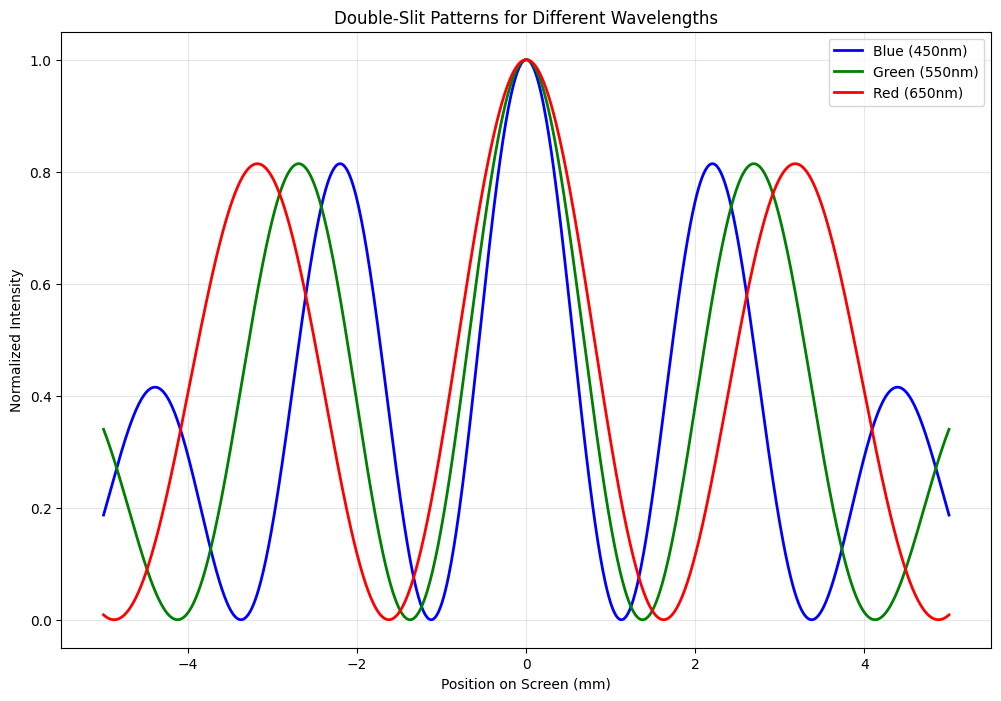

Observations:
• Longer wavelengths (red) → wider fringe spacing
• Shorter wavelengths (blue) → narrower fringe spacing
• This is why laser pointers work better than white light for clear patterns


In [7]:
# Demonstrate wavelength effects
wavelengths = [450e-9, 550e-9, 650e-9]  # Blue, Green, Red
colors = ['blue', 'green', 'red']
labels = ['Blue (450nm)', 'Green (550nm)', 'Red (650nm)']

plt.figure(figsize=(12, 8))

for wavelength, color, label in zip(wavelengths, colors, labels):
    simulator = DoubleslitSimulator(wavelength=wavelength)
    y_pos, intensity = simulator.simulate_experiment()
    
    plt.plot(y_pos * 1000, intensity, color=color, linewidth=2, label=label)

plt.xlabel('Position on Screen (mm)')
plt.ylabel('Normalized Intensity')
plt.title('Double-Slit Patterns for Different Wavelengths')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Observations:")
print("• Longer wavelengths (red) → wider fringe spacing")
print("• Shorter wavelengths (blue) → narrower fringe spacing")
print("• This is why laser pointers work better than white light for clear patterns")

## 4. Experimental Data Analysis

This section shows how to analyze data from your physical experiment.

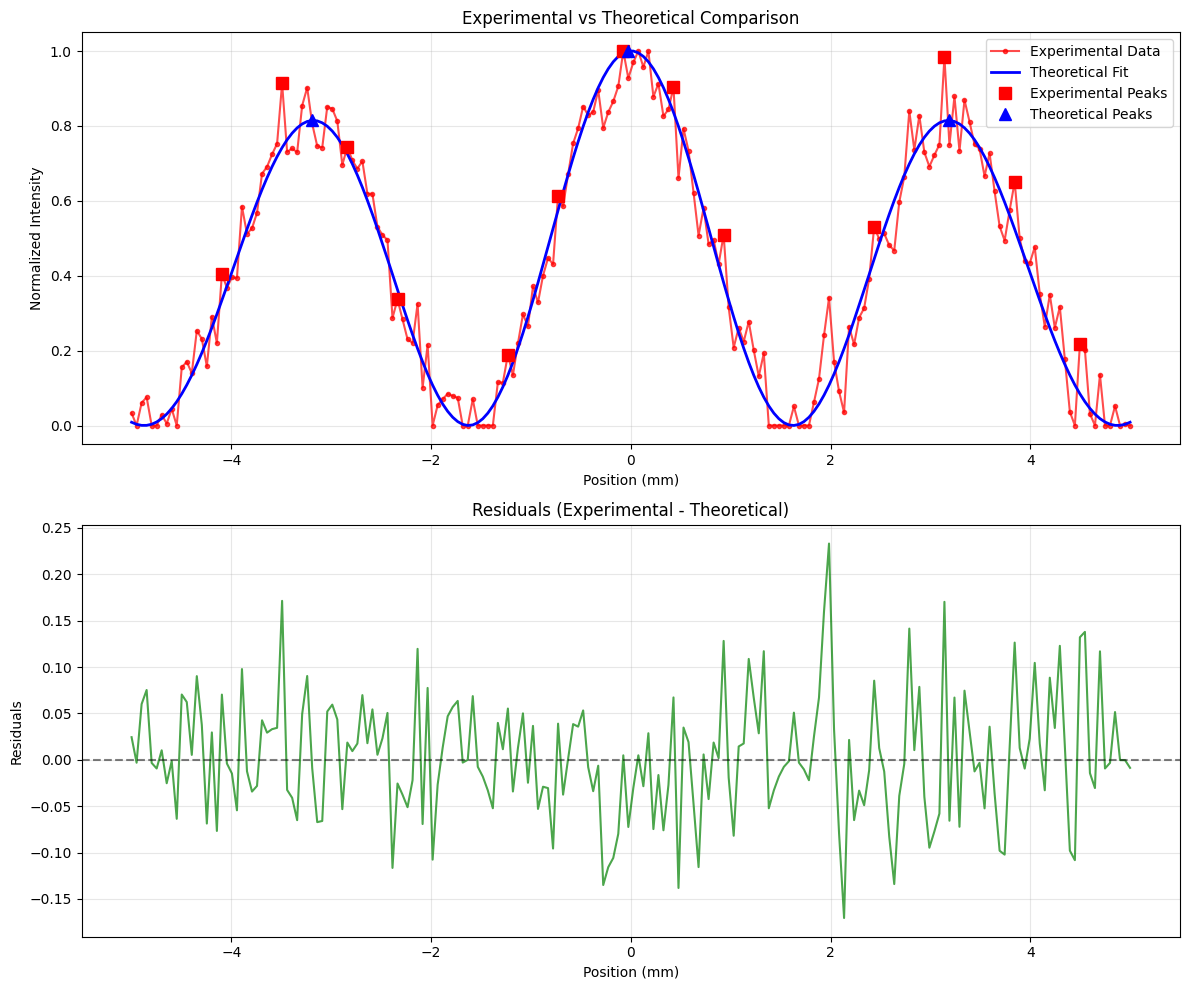

ANALYSIS RESULTS:
Correlation coefficient: 0.979
RMS error: 0.065
Number of peaks found:
  Experimental: 13
  Theoretical: 3
✓ Excellent agreement with theory!


In [8]:
# Example of experimental data analysis
def analyze_experimental_data():
    # Create synthetic experimental data with realistic noise
    simulator = DoubleslitSimulator()
    y_pos, theoretical = simulator.simulate_experiment(resolution=200)
    
    # Add noise to simulate experimental data
    rng = np.random.default_rng(42)
    noise = rng.normal(0, 0.08, len(theoretical))
    experimental = theoretical + noise
    experimental = np.clip(experimental, 0, 1)
    
    # Analyze with InterferenceAnalyzer
    analyzer = InterferenceAnalyzer()
    analyzer.experimental_data = experimental
    
    # Compare with theory
    comparison = analyzer.compare_with_theory(simulator)
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Main comparison
    y_mm = y_pos * 1000
    ax1.plot(y_mm, experimental, 'ro-', alpha=0.7, markersize=3, label='Experimental Data')
    ax1.plot(y_mm, analyzer.theoretical_data, 'b-', linewidth=2, label='Theoretical Fit')
    
    # Mark peaks
    if comparison['experimental_peaks']:
        exp_peak_pos = y_mm[comparison['experimental_peaks']]
        exp_peak_int = experimental[comparison['experimental_peaks']]
        ax1.plot(exp_peak_pos, exp_peak_int, 'rs', markersize=8, label='Experimental Peaks')
    
    if comparison['theoretical_peaks']:
        theo_peak_pos = y_mm[comparison['theoretical_peaks']]
        theo_peak_int = analyzer.theoretical_data[comparison['theoretical_peaks']]
        ax1.plot(theo_peak_pos, theo_peak_int, 'b^', markersize=8, label='Theoretical Peaks')
    
    ax1.set_xlabel('Position (mm)')
    ax1.set_ylabel('Normalized Intensity')
    ax1.set_title('Experimental vs Theoretical Comparison')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Residuals
    residuals = experimental - analyzer.theoretical_data
    ax2.plot(y_mm, residuals, 'g-', alpha=0.7)
    ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    ax2.set_xlabel('Position (mm)')
    ax2.set_ylabel('Residuals')
    ax2.set_title('Residuals (Experimental - Theoretical)')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print analysis results
    print("ANALYSIS RESULTS:")
    print(f"Correlation coefficient: {comparison['correlation']:.3f}")
    print(f"RMS error: {comparison['rms_error']:.3f}")
    print(f"Number of peaks found:")
    print(f"  Experimental: {len(comparison['experimental_peaks'])}")
    print(f"  Theoretical: {len(comparison['theoretical_peaks'])}")
    
    if comparison['correlation'] > 0.9:
        print("✓ Excellent agreement with theory!")
    elif comparison['correlation'] > 0.7:
        print("✓ Good agreement with theory")
    else:
        print("⚠ Poor agreement - check experimental setup")

analyze_experimental_data()

## 5. Physical Experiment Guide

Here's everything you need to know to build your own double-slit experiment.

In [9]:
# Display the experimental setup guide
print(create_experimental_setup_guide())

NameError: name 'create_experimental_setup_guide' is not defined

## 6. Parameter Calculator for Your Experiment

Use this calculator to predict what you should see in your physical experiment.

In [11]:
# Interactive calculator for experimental parameters
def experimental_calculator():
    print("EXPERIMENTAL PARAMETER CALCULATOR")
    print("=" * 40)
    
    # Get input parameters
    wavelength_nm = widgets.FloatText(
        value=650,
        description='Laser wavelength (nm):',
        style={'description_width': 'initial'}
    )
    
    slit_separation_um = widgets.FloatText(
        value=200,
        description='Slit separation (μm):',
        style={'description_width': 'initial'}
    )
    
    screen_distance_m = widgets.FloatText(
        value=1.0,
        description='Screen distance (m):',
        style={'description_width': 'initial'}
    )
    
    calculate_button = widgets.Button(
        description='Calculate',
        button_style='success'
    )
    
    output = widgets.Output()
    
    def on_calculate_clicked(b):
        with output:
            output.clear_output()
            
            # Get values
            wavelength = wavelength_nm.value * 1e-9  # Convert to meters
            slit_sep = slit_separation_um.value * 1e-6  # Convert to meters
            distance = screen_distance_m.value
            
            # Calculate fringe spacing
            fringe_spacing_m = wavelength * distance / slit_sep
            fringe_spacing_mm = fringe_spacing_m * 1000
            
            # Calculate angular spacing
            angular_spacing_rad = wavelength / slit_sep
            angular_spacing_deg = angular_spacing_rad * 180 / np.pi
            
            # Estimate number of visible fringes (in 1cm screen width)
            screen_width = 0.01  # 1 cm
            num_fringes = int(screen_width / (2 * fringe_spacing_m))
            
            print("PREDICTED RESULTS:")
            print("-" * 20)
            print(f"Fringe spacing: {fringe_spacing_mm:.2f} mm")
            print(f"Angular fringe spacing: {angular_spacing_deg:.3f}°")
            print(f"Number of fringes in 1cm: ~{num_fringes*2} total")
            print()
            print("MEASUREMENT TIPS:")
            print(f"• Look for bright spots every {fringe_spacing_mm:.2f} mm")
            print(f"• Central bright fringe should be brightest")
            print(f"• Pattern should be symmetric")
            
            if fringe_spacing_mm < 0.5:
                print("⚠ Fringes may be too close together - increase screen distance")
            elif fringe_spacing_mm > 5:
                print("⚠ Fringes may be too far apart - decrease screen distance")
            else:
                print("✓ Good fringe spacing for observation")
    
    calculate_button.on_click(on_calculate_clicked)
    
    display(wavelength_nm, slit_separation_um, screen_distance_m, 
            calculate_button, output)

experimental_calculator()

EXPERIMENTAL PARAMETER CALCULATOR


FloatText(value=650.0, description='Laser wavelength (nm):', style=DescriptionStyle(description_width='initial…

FloatText(value=200.0, description='Slit separation (μm):', style=DescriptionStyle(description_width='initial'…

FloatText(value=1.0, description='Screen distance (m):', style=DescriptionStyle(description_width='initial'))

Button(button_style='success', description='Calculate', style=ButtonStyle())

Output()

## 7. Data Analysis Template

Use this template to analyze your experimental photos and measurements.

In [12]:
# Template for analyzing your experimental data
def analyze_my_experiment():
    print("TEMPLATE FOR YOUR EXPERIMENTAL ANALYSIS")
    print("=" * 45)
    print()
    print("1. LOAD YOUR IMAGE:")
    print("   # analyzer = InterferenceAnalyzer()")
    print("   # intensity = analyzer.load_image('path_to_your_photo.jpg')")
    print()
    print("2. SET UP SIMULATOR WITH YOUR PARAMETERS:")
    print("   # simulator = DoubleslitSimulator(")
    print("   #     wavelength=650e-9,        # Your laser wavelength")
    print("   #     slit_width=50e-6,         # Measured slit width")
    print("   #     slit_separation=200e-6,   # Measured slit separation")
    print("   #     screen_distance=1.0       # Measured distance")
    print("   # )")
    print()
    print("3. COMPARE WITH THEORY:")
    print("   # comparison = analyzer.compare_with_theory(simulator)")
    print("   # print(f'Correlation: {comparison[\"correlation\"]:.3f}')")
    print()
    print("4. MEASUREMENTS TO RECORD:")
    print("   • Laser wavelength (usually 650nm for red)")
    print("   • Distance from laser to slits")
    print("   • Distance from slits to screen")
    print("   • Slit width (estimate ~50 μm if unmeasurable)")
    print("   • Slit separation (critical - measure carefully!)")
    print("   • Fringe spacing on screen")
    print("   • Number of visible fringes")
    print()
    print("5. PHOTOS TO TAKE:")
    print("   • Overall experimental setup")
    print("   • Close-up of slit apparatus")
    print("   • Clear photo of interference pattern")
    print("   • Pattern with ruler for scale")
    print("   • Video showing the full setup")
    print()
    print("6. ANALYSIS CHECKLIST:")
    print("   □ Pattern shows central bright maximum")
    print("   □ Alternating bright and dark fringes visible")
    print("   □ Pattern is symmetric about center")
    print("   □ Fringe spacing matches theoretical prediction")
    print("   □ Pattern disappears when one slit is blocked")
    
analyze_my_experiment()

TEMPLATE FOR YOUR EXPERIMENTAL ANALYSIS

1. LOAD YOUR IMAGE:
   # analyzer = InterferenceAnalyzer()
   # intensity = analyzer.load_image('path_to_your_photo.jpg')

2. SET UP SIMULATOR WITH YOUR PARAMETERS:
   # simulator = DoubleslitSimulator(
   #     wavelength=650e-9,        # Your laser wavelength
   #     slit_width=50e-6,         # Measured slit width
   #     slit_separation=200e-6,   # Measured slit separation
   #     screen_distance=1.0       # Measured distance
   # )

3. COMPARE WITH THEORY:
   # comparison = analyzer.compare_with_theory(simulator)
   # print(f'Correlation: {comparison["correlation"]:.3f}')

4. MEASUREMENTS TO RECORD:
   • Laser wavelength (usually 650nm for red)
   • Distance from laser to slits
   • Distance from slits to screen
   • Slit width (estimate ~50 μm if unmeasurable)
   • Slit separation (critical - measure carefully!)
   • Fringe spacing on screen
   • Number of visible fringes

5. PHOTOS TO TAKE:
   • Overall experimental setup
   • Close-up 